In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
customer_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,...,7.0,3,0,1,4,0,1,1,0,0
1,1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,3,0,2,4,0,1,1,0,0
3,3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,...,7.0,1,0,1,4,0,1,0,1,0
4,4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,...,3.0,1,0,1,3,0,1,0,0,1


In [4]:
# Getting the name of the first column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
customer_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,7.0,3,0,1,4,0,1,1,0,0
1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,0.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,2,4,0,1,1,0,0
3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,7.0,1,0,1,4,0,1,0,1,0
4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,3.0,1,0,1,3,0,1,0,0,1


In [6]:
# import the PCA class from scikit learn
from sklearn.decomposition import PCA

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) -1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data)

PCA(copy=True, iterated_power='auto', n_components=363, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[7.67335018e-01 1.87111768e-01 3.25792935e-02 1.23050439e-02
 1.49945704e-04 1.20514956e-04 7.14721865e-05 4.82929112e-05
 3.74820815e-05 2.37657140e-05 2.22471283e-05 1.37888072e-05
 1.00935211e-05 5.77980460e-06 5.68091152e-06 5.15706887e-06
 4.69781134e-06 4.19423534e-06 3.98388313e-06 3.81104463e-06
 3.67447413e-06 2.90460272e-06 2.83111954e-06 2.52186478e-06
 2.44617787e-06 2.35156217e-06 2.19396627e-06 2.12683531e-06
 2.09559557e-06 2.05433513e-06 2.01976776e-06 2.00449404e-06
 1.91594385e-06 1.89919359e-06 1.87089862e-06 1.83417299e-06
 1.75617769e-06 1.75015237e-06 1.69594356e-06 1.65479929e-06
 1.58815922e-06 1.56644211e-06 1.52907976e-06 1.48544970e-06
 1.47063951e-06 1.43801247e-06 1.39248492e-06 1.36992319e-06
 1.33059609e-06 1.30015416e-06 1.28350875e-06 1.26346047e-06
 1.22178470e-06 1.20485983e-06 1.15633764e-06 1.14022143e-06
 1.08660150e-06 1.06058034e-06 1.04480503e-06 9.89149938e-07
 9.85063395e-07 9.69763262e-07 9.47813201e-07 9.38390687e-07
 9.20089323e-07 9.171494

In [17]:
# Getting an array of the cumulative sum of explained variance ratios in order to visualize the number of components needed
explained_var_cumulative = np.cumsum(explained_variance_ratio)

In [19]:
# Creating the x-axis for the plot of the explained variance over the number of components plot
x_axis = [*range(1, len(explained_var_cumulative)+1)]

Text(0, 0.5, 'Cumulative Variance')

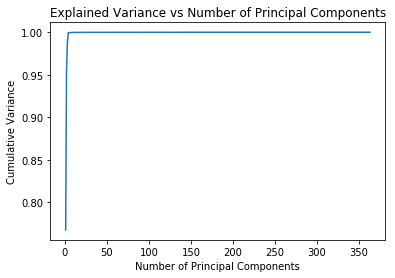

In [22]:
# Creating the plot for the explained variance over the number of components plot
plt.plot(x_axis, explained_var_cumulative)
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

Text(0, 0.5, 'Cumulative Variance')

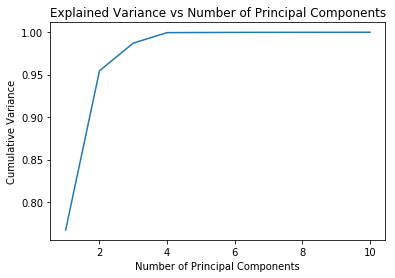

In [26]:
# Decreasing the number of principal components in order to see the elbow more clearly
plt.plot(x_axis[:10], explained_var_cumulative[:10])
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

In [27]:
print(explained_var_cumulative[0:10])

[0.76733502 0.95444679 0.98702608 0.99933112 0.99948107 0.99960158
 0.99967306 0.99972135 0.99975883 0.9997826 ]


In [28]:
# Reducing the dimensionality of the data using 4 principal components
pca_4 = PCA(n_components=4)
customer_data_reduced = pca_4.fit_transform(customer_data)

In [30]:
print(customer_data_reduced[:5])

[[ -167.50778327  1322.33314145   480.88485023    93.33802688]
 [ 1217.92890967   341.84266331  -505.82129635  1345.63449333]
 [  -14.05555997  1203.27539828  -255.04957884   -11.79073767]
 [  -79.1714955   1253.69244421    53.1162532     33.25429438]
 [-1105.63909389  -421.3090717   -129.97357673   -54.60151707]]


In [33]:
# Creating a dataframe that contains the correlations between a principal component and the features
component_makeup = pd.DataFrame(pca_4.components_, columns=customer_data.columns, index=[1, 2, 3, 4])

In [34]:
component_makeup.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
1,-0.000541,-0.000766,-0.003803,-0.003567,-0.001634,-0.000303,-0.000332,-0.000951,-0.001554,-0.000291,...,-0.001395,0.000170,-0.000002,0.000047,-0.000496,0.000008,-0.000008,-0.000007,0.000004,0.000002
2,0.000061,0.000561,0.000449,-0.000937,0.001563,0.000218,0.000150,0.000463,0.001552,0.000178,...,0.000835,-0.000177,-0.000035,-0.000073,0.000396,-0.000052,0.000052,0.000053,-0.000014,-0.000038
3,-0.000209,-0.000602,-0.000775,-0.000854,-0.003153,-0.000087,-0.000129,-0.000225,-0.002911,-0.000142,...,0.000576,-0.000387,0.000004,-0.000022,-0.000220,-0.000007,0.000007,0.000003,-0.000007,0.000003
4,0.000713,0.001027,0.003572,0.002638,-0.002726,-0.000379,0.000385,0.001095,-0.002527,0.000355,...,-0.001460,0.000530,-0.000003,-0.000071,0.000630,-0.000034,0.000034,0.000044,-0.000021,-0.000023
